In [1]:
# libraries needed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    
)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier


# read data

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [3]:
##data info
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

(20758, 18)

- Gender: Female/Male
- Age: Numeric value
- Height: Numeric value in meters
- Weight: Numeric value in kilograms
- family_history_with_overweight: Has a family member suffered or suffers from being overweight? Yes/No
- FAVC: Do you eat high-caloric food frequently? Yes/No
- FCVC: Do you usually eat vegetables in your meals?
- NCP: How many main meals do you have daily? Between One/Two/Three/More than three
- CAEC: Do you eat any food between meals? No/Sometimes/Frequently/Always
- SMOKE: Do you smoke? Yes/No
- CH20: How much water do you drink daily? Less than a liter/Between 1 and 2 L/More than 2 L
- SCC: Do you monitor the calories you eat daily? Yes/No
- FAF: How many hours do you perform physical activity?
- TUE: How many hours do you use technological devices such as cell phones, video games, television, computer, and others?
- CALC: How often do you drink alcohol? No/Sometimes/Frequently/Always
- MTRANS: Which transportation do you usually use? Automobile/Motorbike/Bike/Public Transportation/Walking
- NObeyesdad: Obesity Level — Insufficient Weight / Normal Weight / Overweight Level I / Overweight Level II / Obesity Type I / Obesity Type II / Obesity Type III

## cleaning

In [4]:
#change columns to lower case
df_train.columns = [x.lower() for x in df_train.columns]
df_train.head(0)

,id,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad


In [5]:
## checking for missing NaN
missing_data= df_train.isnull().sum()
missing_data

id                                0
gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

In [6]:
# drop duplicate
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:  Empty DataFrame
Columns: [id, gender, age, height, weight, family_history_with_overweight, favc, fcvc, ncp, caec, smoke, ch2o, scc, faf, tue, calc, mtrans, nobeyesdad]
Index: []


In [7]:
#descriptive stats

# check count, unique, missing
desc_df = df_train.describe(include ="all").transpose()
desc_df['unique'] = desc_df['unique'].fillna(df_train.nunique())
desc_df['count'] = desc_df['count'].astype('int16')
desc_df['missing'] = df_train.shape[0] - desc_df['count']
desc_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing
id,20758,20758,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0,0
gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
age,20758,1703,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0,0
height,20758,1833,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663,0
weight,20758,1979,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269,0
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
favc,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fcvc,20758,934,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0,0
ncp,20758,689,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0,0
caec,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df_train.dtypes

id                                  int64
gender                             object
age                               float64
height                            float64
weight                            float64
family_history_with_overweight     object
favc                               object
fcvc                              float64
ncp                               float64
caec                               object
smoke                              object
ch2o                              float64
scc                                object
faf                               float64
tue                               float64
calc                               object
mtrans                             object
nobeyesdad                         object
dtype: object

## visualization

In [9]:
# Select columns with 'object' dtype except the last element

label = "nobeyesdad"


## changing suspect columns to categorical
df_train["ncp"] = df_train["ncp"].round().astype("object")
df_train["ch2o"] = df_train["ch2o"].round().astype("object")
##categorical
object_columns = list(df_train.select_dtypes(include='object').columns)
del object_columns[-1]
print(object_columns)


numeric_columns = list(df_train.select_dtypes(include=np.number).columns)
del numeric_columns[0]
print(numeric_columns)
# del numeric_columns[-1]
# to include numbers numeric_columns = df_train.select_dtypes(include=np.number)

['gender', 'family_history_with_overweight', 'favc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'calc', 'mtrans']
['age', 'height', 'weight', 'fcvc', 'faf', 'tue']


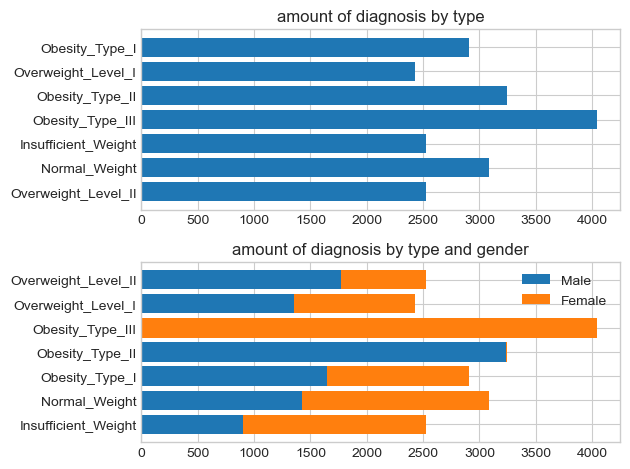

In [10]:
plt.style.use("seaborn-v0_8-whitegrid")
class_total = df_train.nobeyesdad.value_counts(sort =False)


#________________________________________
# visualize bar chart of classes
plt.style.use("seaborn-v0_8-whitegrid")
# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot the data on each subplot
ax1.barh(width = np.array(class_total),  y = class_total.index)
ax1.set_title('amount of diagnosis by type')

#_____________________________________________________________________
# Calculate the frequency of each class and gender
df_freq = df_train.value_counts(['nobeyesdad', 'gender'])
# Reshape the data by class and gender
df_unstack = df_freq.unstack('gender')

# visualize bar chart of classes by gender stacked bar chart
ax2.barh(df_unstack.index, df_unstack['Male'], label='Male') # plot the male column
ax2.barh(df_unstack.index, df_unstack['Female'], left=df_unstack['Male'], label='Female') # plot the female column
ax2.set_title('amount of diagnosis by type and gender')
ax2.legend() # add a legend
#__________________________________________________________________

# Adjust the layout and show the figure
fig.tight_layout()
plt.show()


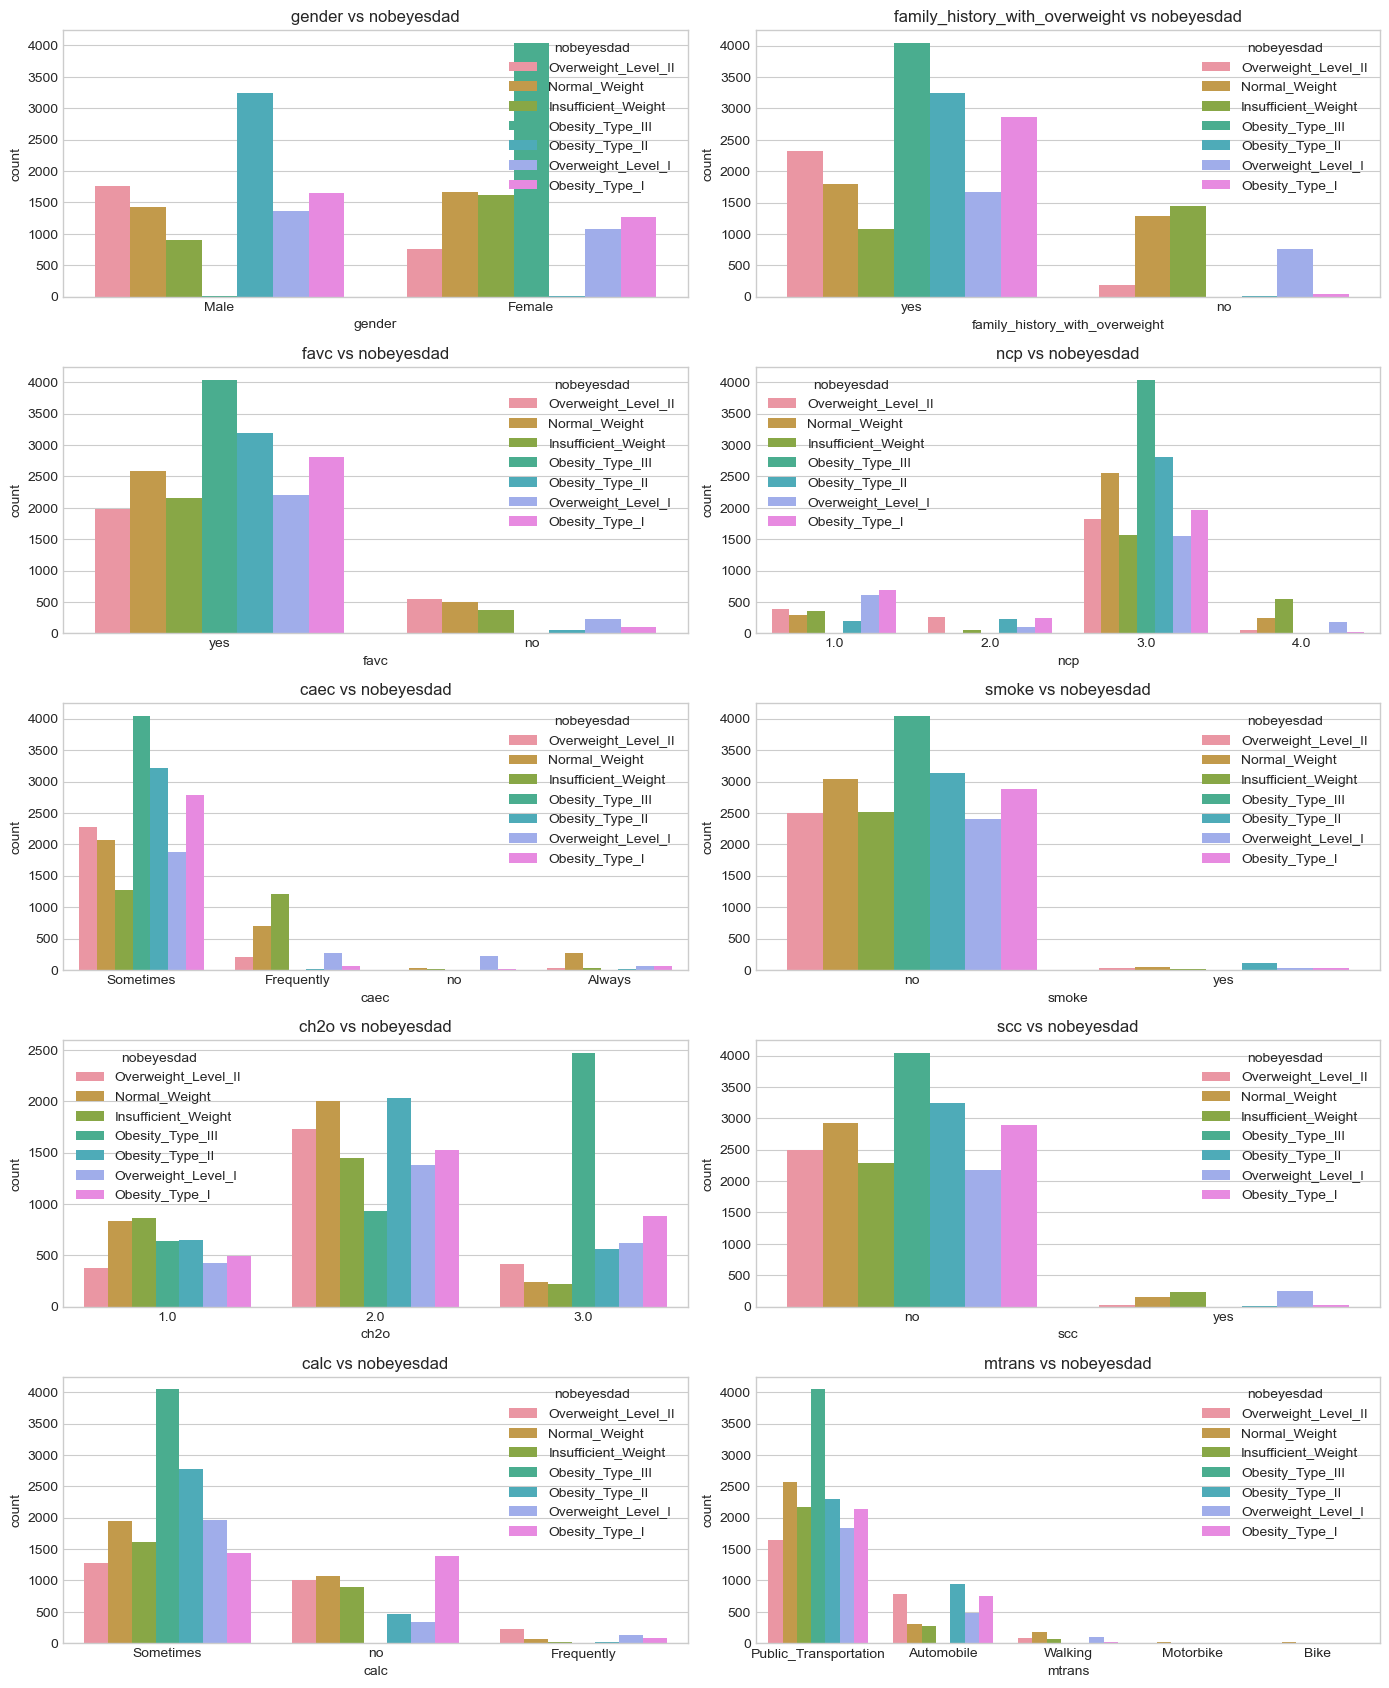

In [11]:
## distribution plots
## categorical features
plt.style.use("seaborn-v0_8-colorblind")
plt.figure(figsize=(14, len(object_columns) * 2))
for i, col in enumerate(object_columns):
    plt.subplot(len(object_columns) // 2 + 1, 2, i + 1)
    sns.countplot(x=col, hue=label, data=df_train)
    plt.title(f"{col} vs {label}")
    plt.tight_layout()

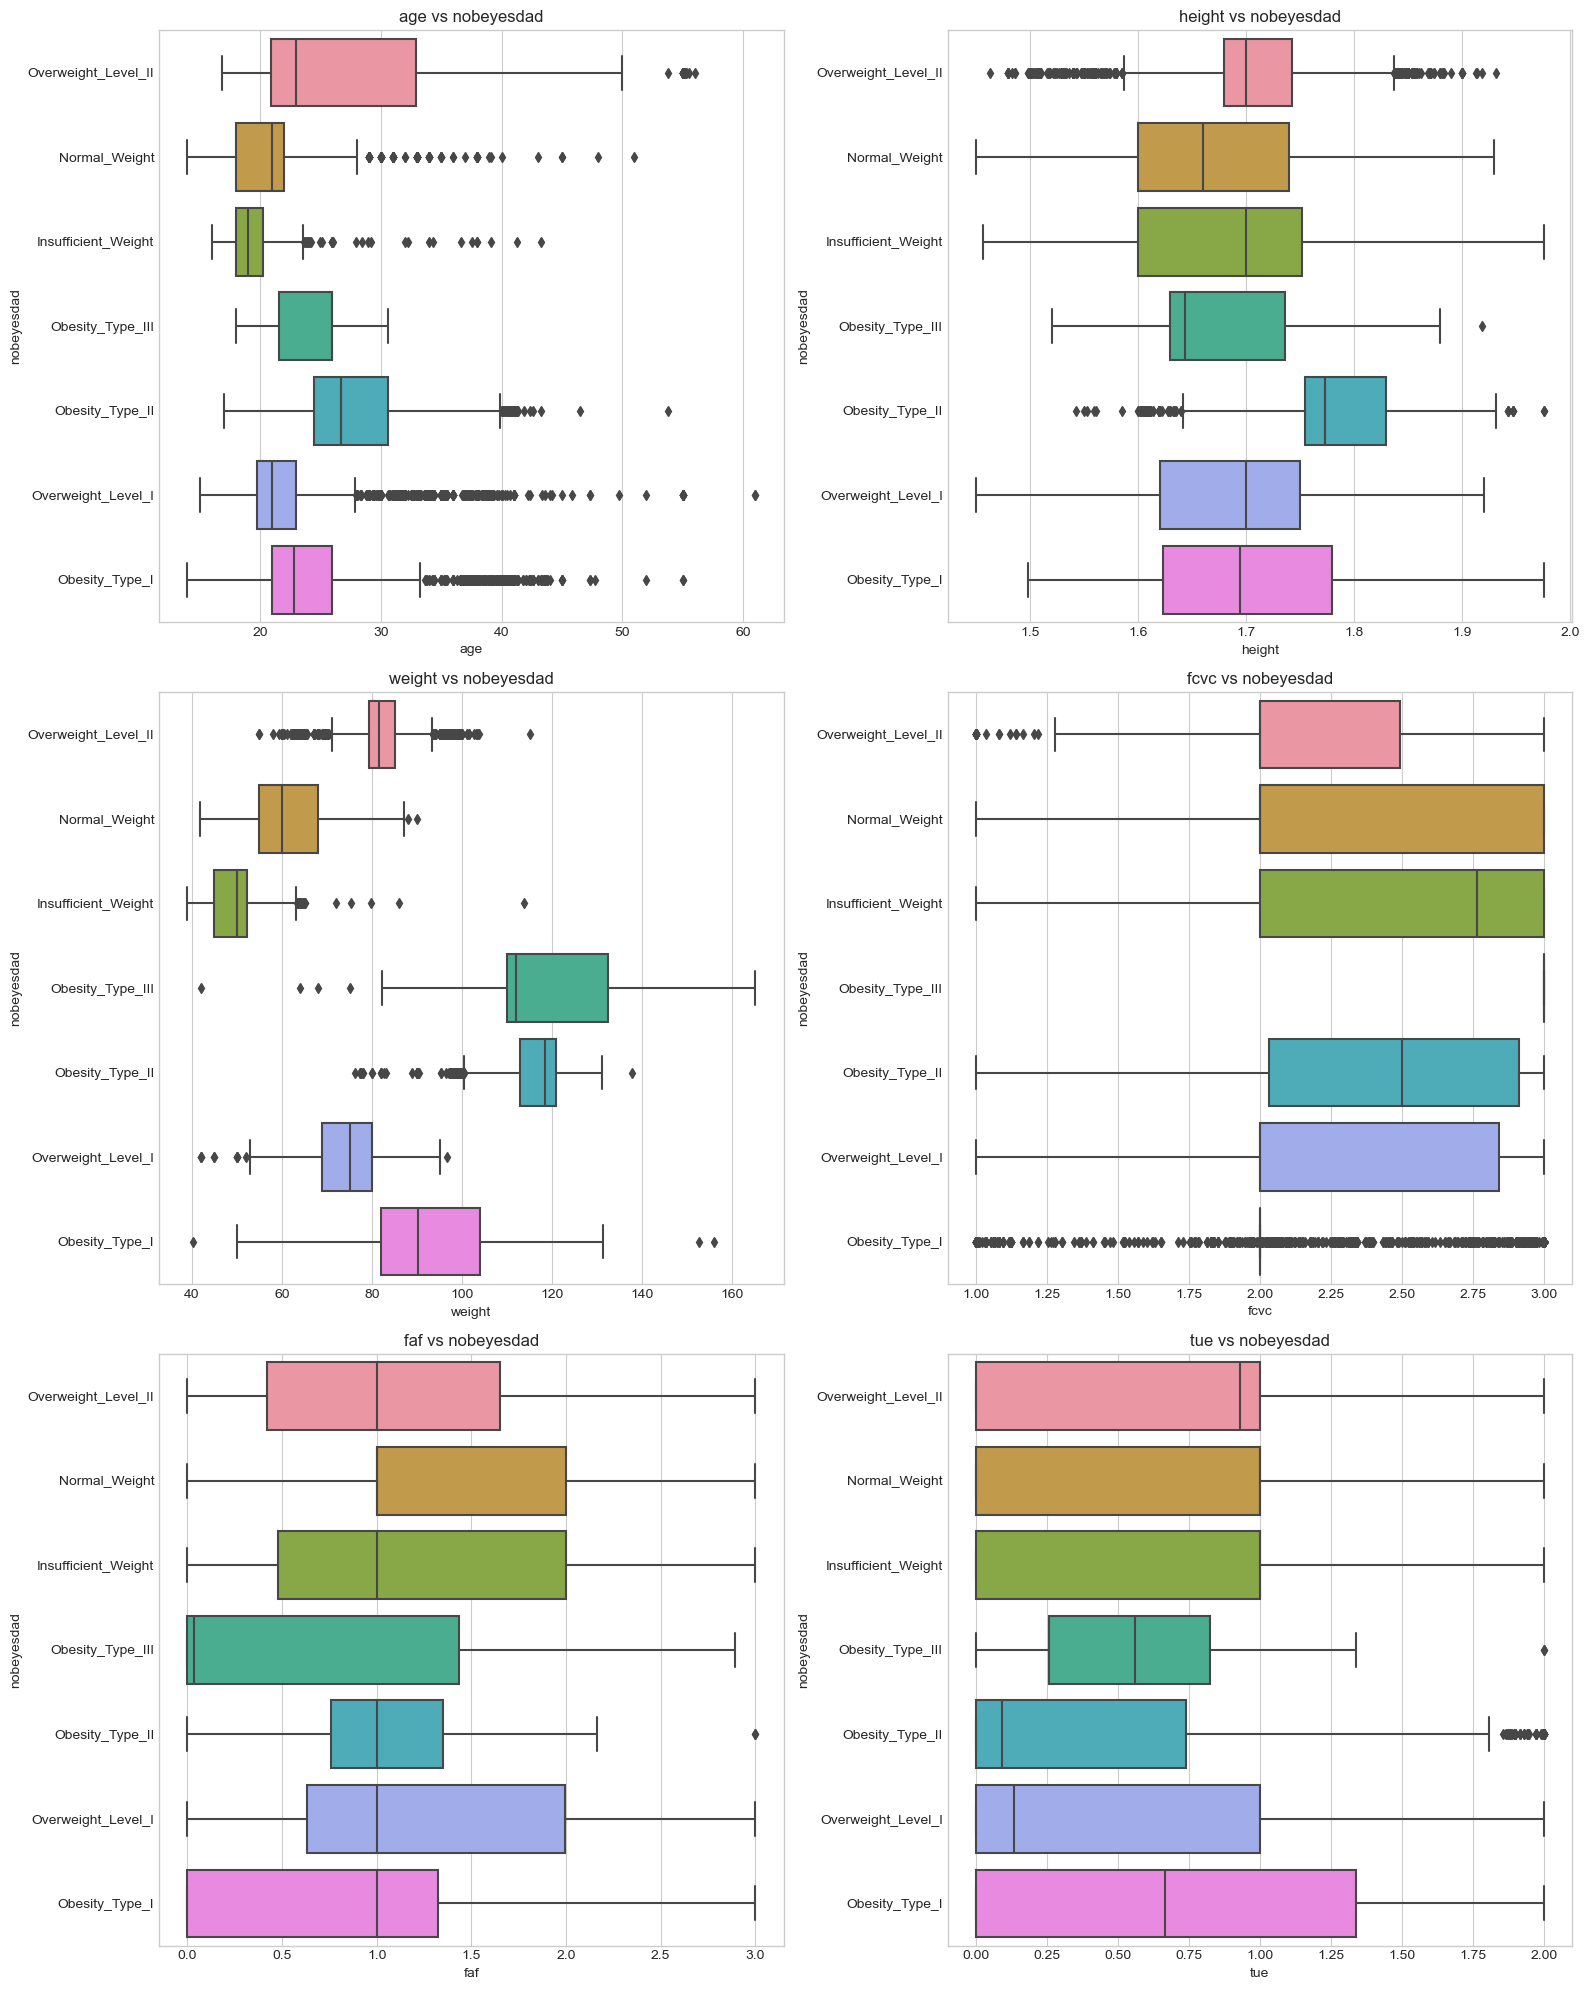

In [12]:
## distribution plots
## continuous output
plt.style.use("seaborn-v0_8-colorblind")



fig, axes = plt.subplots(3, 2, figsize=(16, 20))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numeric_columns[i], y=label, data=df_train, ax=ax)
    # Set x ticks to be the original labels (inverse transform)
    ax.set_title(f"{numeric_columns[i]} vs {label}")
plt.tight_layout()
plt.show()


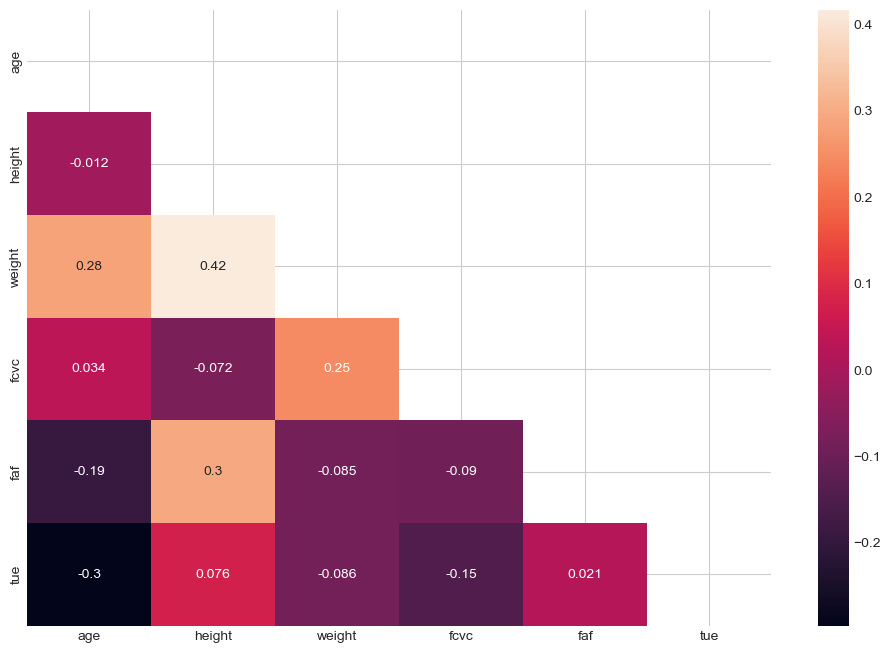

In [13]:
## construct the correlatio matrix

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_train[numeric_columns].corr(), dtype=bool))
sns.heatmap(df_train[numeric_columns].corr(), annot=True, mask=mask)
plt.show()

there are no highly correlated features. there is a week relationship between **age and tue**, **age and height**, and **faf and height**

Absolute value of r	Strength of relationship
- r < 0.25	No relationship
- 0.25 < r < 0.5	Weak relationship
- 0.5 < r < 0.75	Moderate relationship
- r > 0.75	Strong relationship


let's investigate further with a pairplot

In [ ]:
# pairplot = sns.pairplot(df_train[numeric_columns + [label]].sample(frac=.10), 
#                  hue=label, 
#                  corner=True)

## data split

In [15]:
#data split
X = df_train[numeric_columns]
y = df_train[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

# Print the original labels and their corresponding encoded values
print('Original Labels:', y)
print('Encoded Labels:', y_train_encoded)
print('Unique Classes (in order):', le.classes_)

Original Labels: 0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: nobeyesdad, Length: 20758, dtype: object
Encoded Labels: [2 2 0 ... 0 2 6]
Unique Classes (in order): ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [16]:
def full_modeling(alg, alg_name, x_train, x_test, y_train, y_test, params={}):
    model = alg(**params)  # Instantiate the algorithm class and parameters
    model.random_state = 100
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    # Performance evaluation
    def print_scores(y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("Accuracy:", acc_score)
        pre_score = precision_score(y_true, y_pred, average='weighted')
        print("Precision:", pre_score)
        rec_score = recall_score(y_true, y_pred, average='weighted')
        print("Recall:", rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("F1 Score:", f_score)

    print_scores(y_test, y_pred)
    return model, y_pred

In [17]:
xgb_model, y_pred = full_modeling(XGBClassifier, '\nXG Boost', X_train, X_test, y_train_encoded, y_test_encoded)


XG Boost
Accuracy: 0.8884874759152216
Precision: 0.887793360087377
Recall: 0.8884874759152216
F1 Score: 0.8880610713576743


Submit predictions¶
We load the test data, we make predictions and we store them in the file submission.csv

In [18]:
df_test = pd.read_csv("test.csv")
df_test.columns = [x.lower() for x in df_test.columns]


### make prediction


In [19]:
X_test = df_test[numeric_columns] 
X_test = sc.transform(X_test)

prediction = xgb_model.predict(X_test)
original_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
le.fit(original_labels)

y_pred_original  = le.inverse_transform(prediction)

predictions_df = pd.DataFrame({'ID': df_test['id'], 'nobeyesdad': y_pred_original})

In [20]:
prediction

array([3, 5, 4, ..., 0, 1, 3], dtype=int64)

In [21]:
predictions_df.value_counts(['nobeyesdad'])

nobeyesdad         
Obesity_Type_III       2637
Obesity_Type_II        2115
Normal_Weight          2107
Obesity_Type_I         2049
Insufficient_Weight    1728
Overweight_Level_II    1723
Overweight_Level_I     1481
dtype: int64